<H1><marquee>BANK MARKETING</marquee> </H1>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
import seaborn as sns

In [124]:
df = pd.read_csv('termdeposit_train.csv')

In [125]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [126]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [128]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [129]:
df_test = pd.read_csv('termdeposit_test.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [130]:
df_test['subscribed'] = 'X'
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown,X
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,X
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,X
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown,X
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,X
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,X
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,X
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,X


In [131]:
#We will merge train and test dataset 

In [132]:
df = pd.concat([df, df_test])
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,X
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,X
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,X
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,X


In [133]:
#We will drop ID column as it is unique and doesnt have any say on subscription outcome variable

In [134]:
df.drop('ID',axis=1,inplace=True)

In [135]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,X
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,X
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,X
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,X


In [136]:
#Exploratory Data Analysis

In [137]:
#we will use onlt training data for data analysis purpose
df_of = df.iloc[0:31647,]
df_of

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [138]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [139]:
#There are no null values in the dataset

<Axes: ylabel='Frequency'>

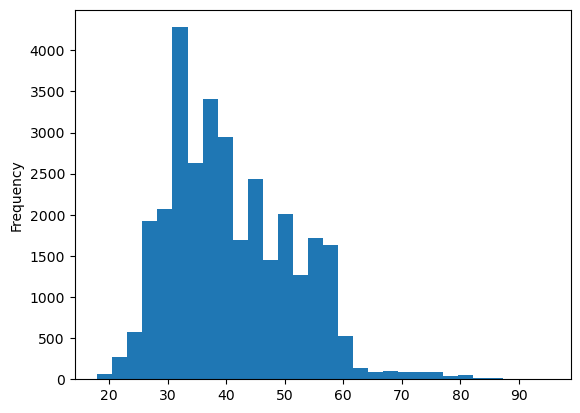

In [140]:
df_of['age'].plot.hist(bins=30)

In [141]:
#Most customers are in the age of 30 to 45

<Axes: xlabel='marital', ylabel='count'>

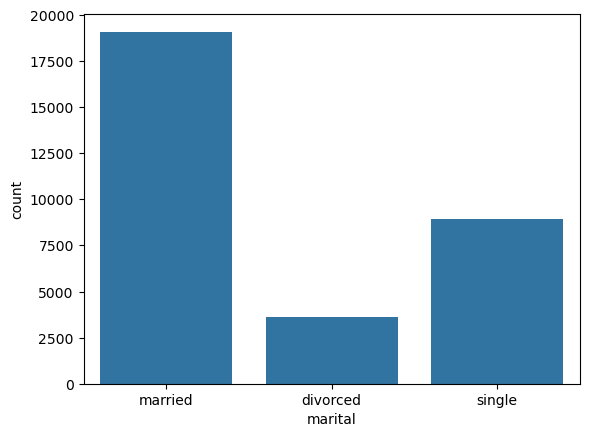

In [142]:
sns.countplot(data=df_of,x='marital')

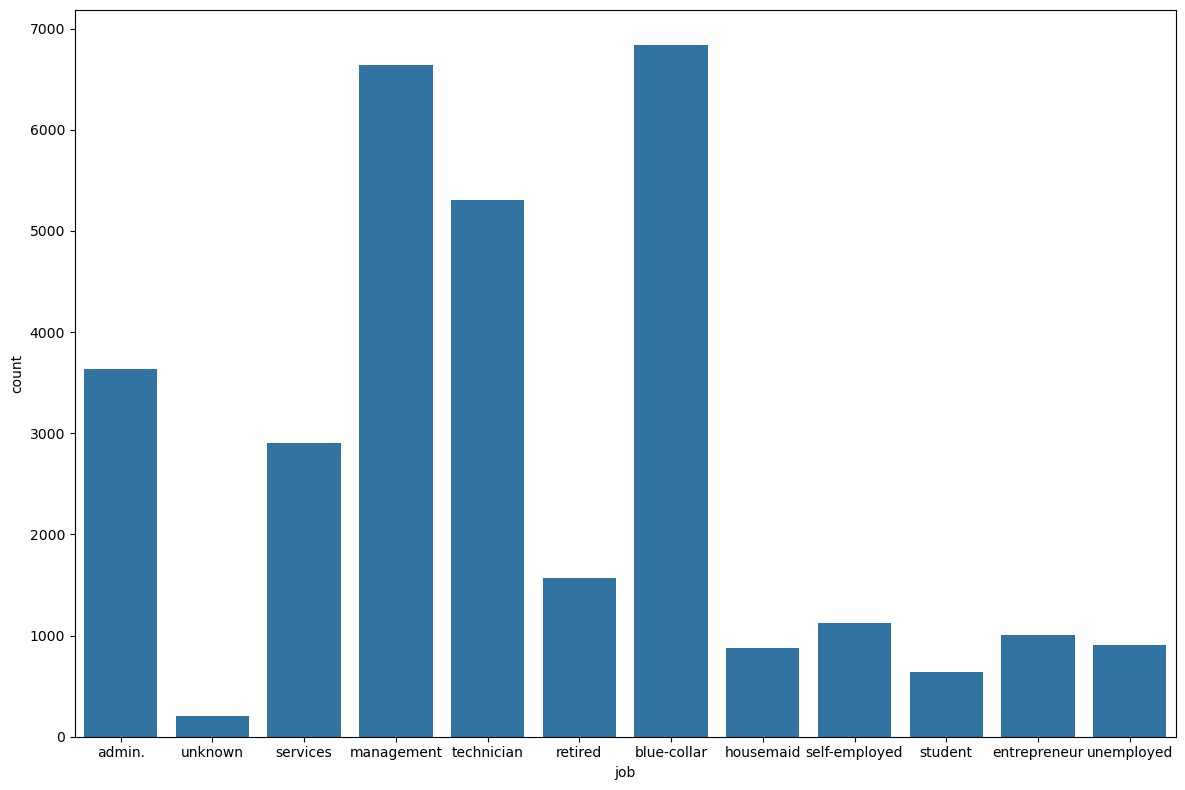

In [143]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_of,x='job')
plt.tight_layout()

<Axes: xlabel='education', ylabel='count'>

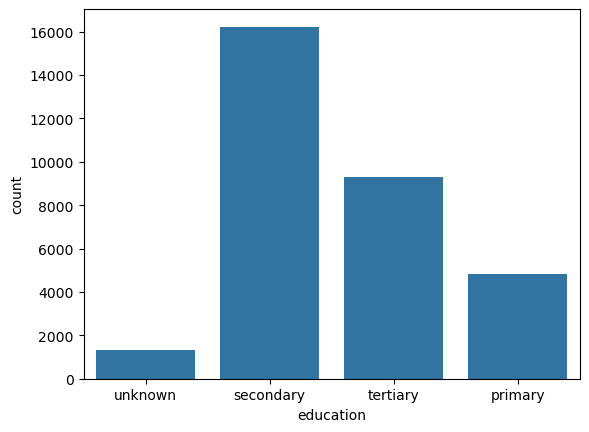

In [144]:
sns.countplot(data=df_of,x='education')

<Axes: xlabel='subscribed', ylabel='count'>

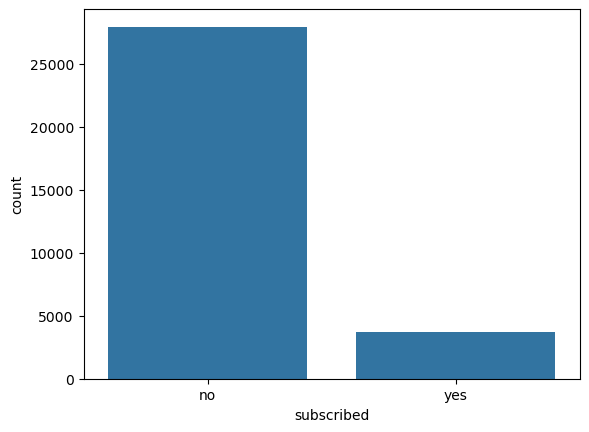

In [145]:
sns.countplot(x='subscribed',data=df_of)

In [146]:
#This is an imbalance dataset
'''ignore x as it is test variable'''

'ignore x as it is test variable'

<Axes: xlabel='age', ylabel='Density'>

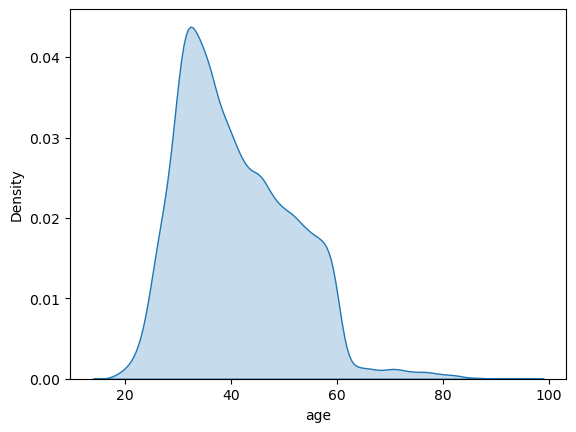

In [147]:
sns.kdeplot(data=df_of,x='age',fill=True)

In [148]:
import warnings
warnings.filterwarnings(action='ignore')

<Axes: xlabel='age', ylabel='balance'>

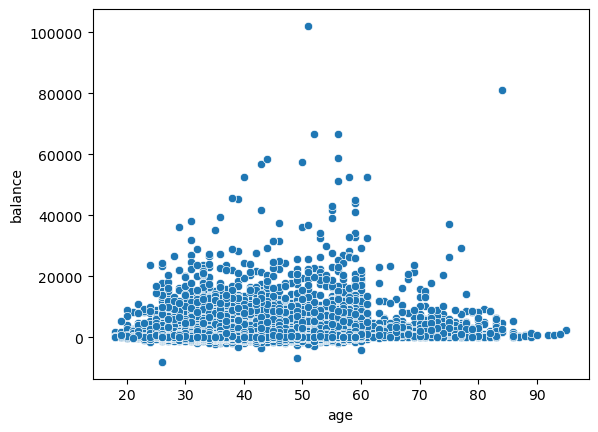

In [149]:
sns.scatterplot(data=df_of,x='age',y='balance')

<Axes: xlabel='age', ylabel='balance'>

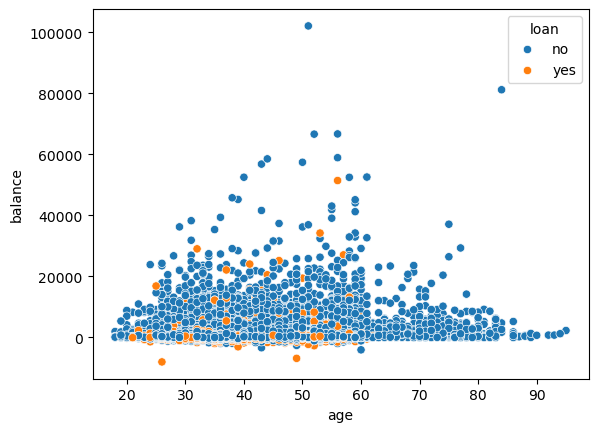

In [150]:
sns.scatterplot(data=df_of,x='age',y='balance',hue='loan')

<Axes: xlabel='age', ylabel='balance'>

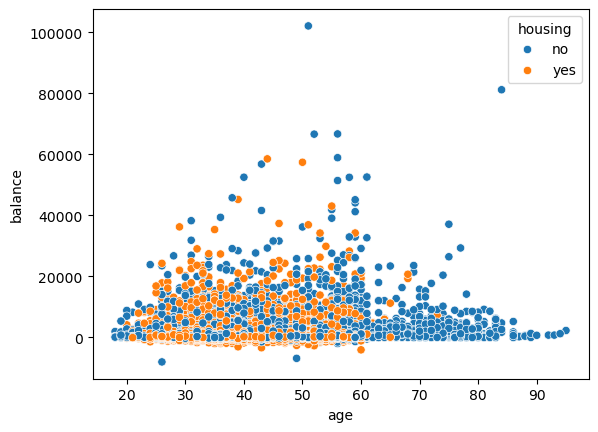

In [151]:
sns.scatterplot(data=df_of,x='age',y='balance',hue='housing')

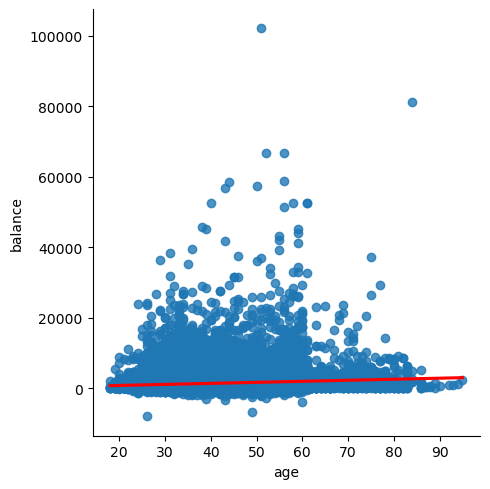

In [152]:
sns.lmplot(data=df_of,x='age',y='balance',line_kws={'color':'red'})

In [153]:
df_of['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

<Axes: xlabel='subscribed', ylabel='age'>

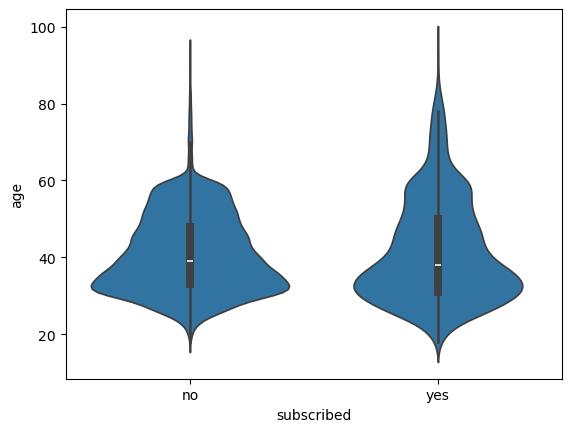

In [154]:
sns.violinplot(data=df_of,x='subscribed',y='age')

<Axes: xlabel='subscribed', ylabel='age'>

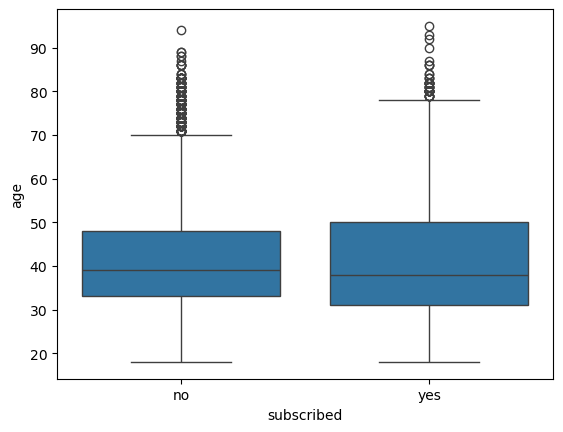

In [155]:
sns.boxplot(data=df_of,x='subscribed',y='age')

<Axes: xlabel='subscribed', ylabel='balance'>

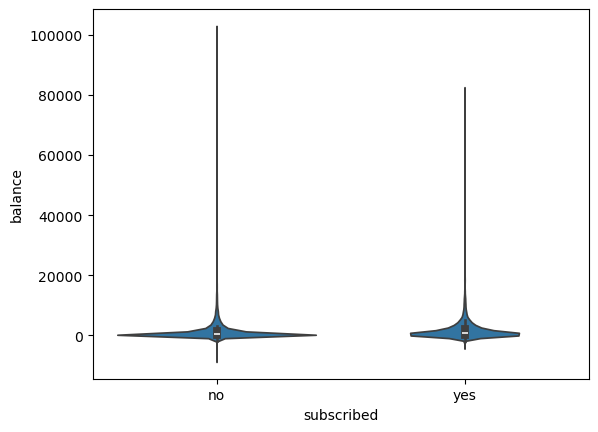

In [156]:
sns.violinplot(data=df_of,x='subscribed',y='balance')

<Axes: xlabel='subscribed', ylabel='balance'>

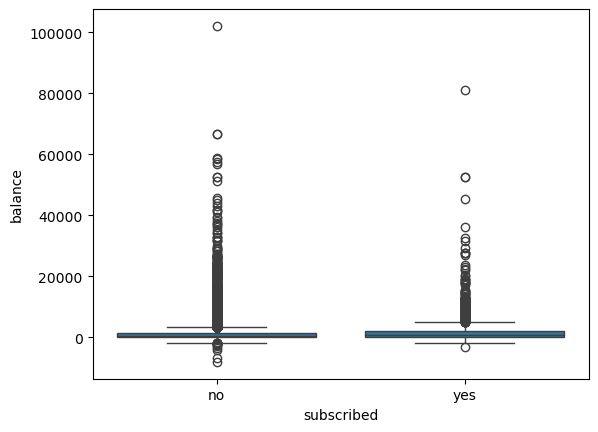

In [157]:
sns.boxplot(data=df_of,x='subscribed',y='balance')

In [158]:
#There are more people who have subscribed are older people

In [159]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [160]:
df_of['contact'].value_counts()

contact
cellular     20423
unknown       9177
telephone     2047
Name: count, dtype: int64

<Axes: xlabel='contact', ylabel='count'>

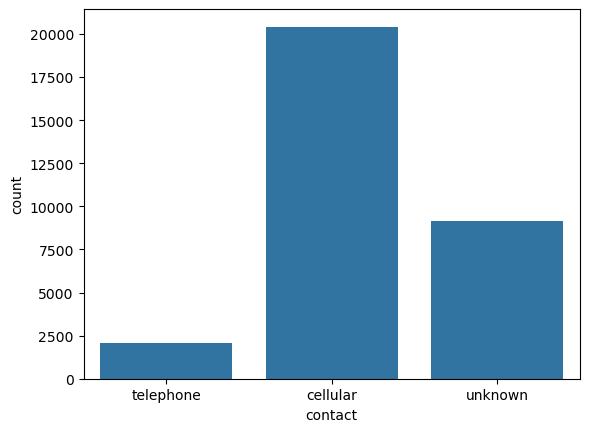

In [161]:
sns.countplot(data=df_of,x='contact')

In [162]:
df_of['poutcome'].value_counts()

poutcome
unknown    25929
failure     3362
other       1288
success     1068
Name: count, dtype: int64

<Axes: xlabel='poutcome', ylabel='count'>

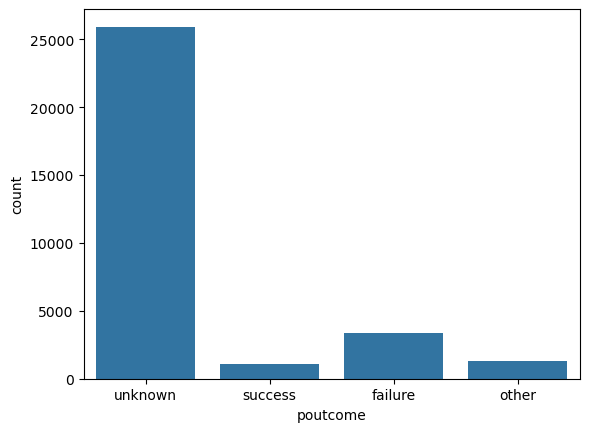

In [163]:
sns.countplot(data=df_of,x='poutcome')

In [164]:
#Most customers may have asked for some time to think about subscription

<Axes: xlabel='previous', ylabel='Count'>

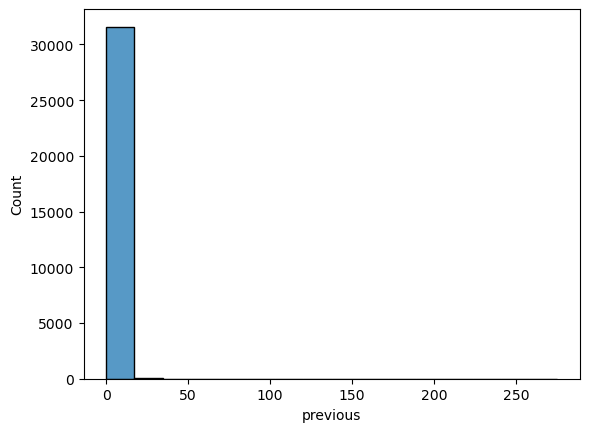

In [165]:
sns.histplot(data=df_of,x='previous')

<Axes: xlabel='previous', ylabel='Density'>

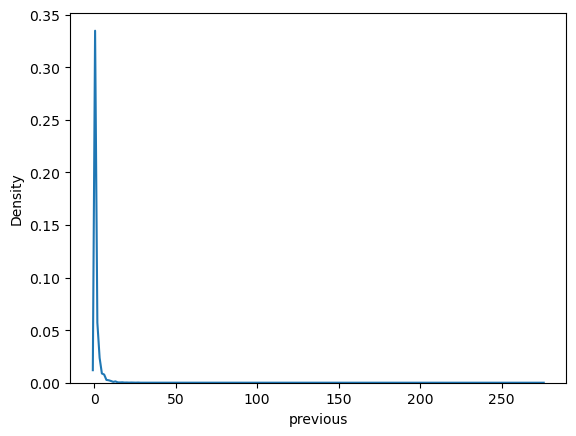

In [166]:
sns.kdeplot(data=df_of,x='previous')

In [167]:
#Apart from few customers, most have been contact between 0 and 10 times

<Axes: xlabel='pdays', ylabel='Count'>

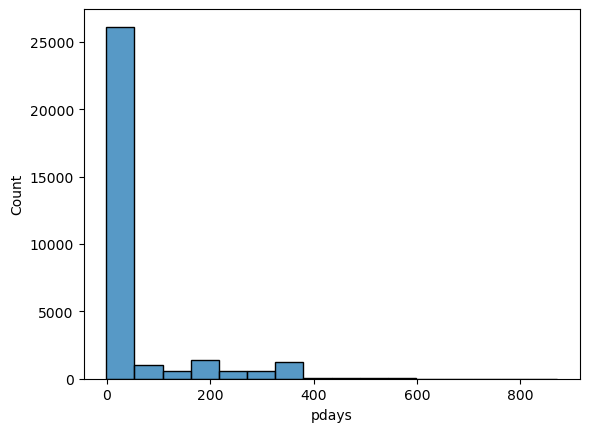

In [168]:
sns.histplot(data=df_of,x='pdays')

<Axes: xlabel='pdays', ylabel='Density'>

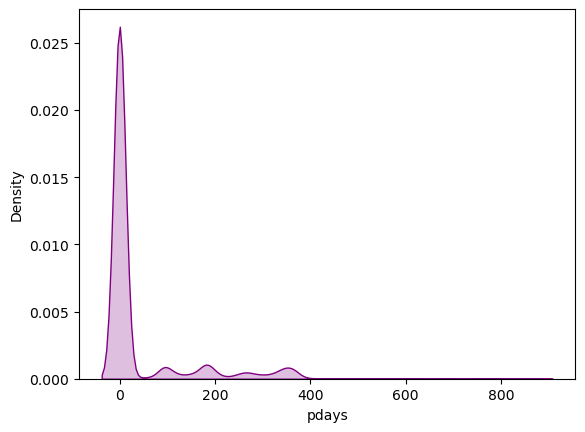

In [169]:
sns.kdeplot(data=df_of,x='pdays',fill=True,color='purple')

<Axes: xlabel='campaign', ylabel='Count'>

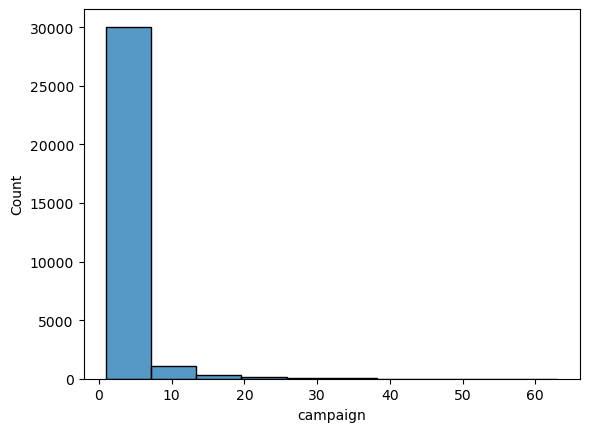

In [170]:
sns.histplot(data=df_of,x='campaign',bins=10)

<Axes: xlabel='campaign', ylabel='Density'>

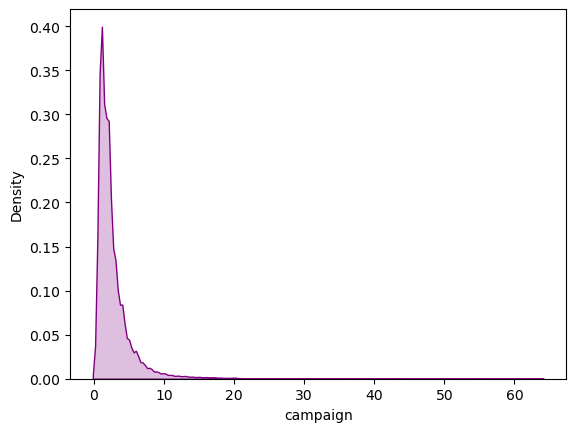

In [171]:
sns.kdeplot(data=df_of,x='campaign',fill=True,color='purple')

In [172]:
#Almost all customers have been contacted 0 to 10 times during this campaign of selling fixed deposit scheme

In [173]:
df_of.groupby(by='month').describe()

age                                                     balance  \
        count       mean        std   min   25%   50%   75%   max   count   
month                                                                       
apr    2055.0  39.638443  10.974485  19.0  32.0  37.0  45.0  95.0  2055.0   
aug    4333.0  42.902146  10.560302  18.0  34.0  42.0  51.0  93.0  4333.0   
dec     157.0  45.445860  16.468850  19.0  31.0  42.0  57.0  89.0   157.0   
feb    1827.0  40.906404  11.725806  18.0  32.0  38.0  48.0  84.0  1827.0   
jan     977.0  40.340839  11.239727  20.0  31.0  38.0  48.0  82.0   977.0   
jul    4844.0  41.081131  10.309030  19.0  32.0  40.0  49.0  83.0  4844.0   
jun    3738.0  42.367844   9.983733  19.0  35.0  41.0  50.0  83.0  3738.0   
mar     342.0  43.254386  16.048576  19.0  30.0  38.0  56.0  94.0   342.0   
may    9669.0  38.902265   9.329589  18.0  32.0  37.0  45.0  83.0  9669.0   
nov    2783.0  42.203737   9.664083  18.0  34.0  41.0  50.0  82.0  2783.0   
oct     512.0  45.794922  16.110763  19.0  32.0  43.0  58.0  92.0   512.0   
sep     410.0  44.709756  17.182642  18.0  31.0  39.0  58.0  89.0   410.0   

                    ...   pdays        previous                                \
              mean  ...     75%    max    count      mean       std  min  25%   
month               ...                                                         
apr    1459.552798  ...  222.50  633.0   2055.0  1.057421  2.228350  0.0  0.0   
aug    1425.272790  ...   -1.00  782.0   4333.0  0.293561  1.398505  0.0  0.0   
dec    2268.808917  ...  195.00  536.0    157.0  1.853503  2.971694  0.0  0.0   
feb    1256.474548  ...  175.50  616.0   1827.0  1.187192  6.853097  0.0  0.0   
jan     966.960082  ...  170.00  555.0    977.0  1.068577  2.651246  0.0  0.0   
jul     932.055120  ...   -1.00  792.0   4844.0  0.116226  0.794567  0.0  0.0   
jun    1658.006421  ...   -1.00  756.0   3738.0  0.180043  1.049718  0.0  0.0   
mar    2095.084795  ...  154.75  667.0    342.0  1.114035  2.070993  0.0  0.0   
may    1046.748371  ...   -1.00  557.0   9669.0  0.583101  1.977806  0.0  0.0   
nov    2497.848724  ...   97.00  871.0   2783.0  0.875314  2.203335  0.0  0.0   
oct    2314.919922  ...  144.00  805.0    512.0  1.501953  2.622348  0.0  0.0   
sep    1718.685366  ...  129.25  854.0    410.0  1.865854  3.316117  0.0  0.0   

                        
       50%  75%    max  
month                   
apr    0.0  1.0   25.0  
aug    0.0  0.0   35.0  
dec    1.0  2.0   19.0  
feb    0.0  1.0  275.0  
jan    0.0  1.0   38.0  
jul    0.0  0.0   17.0  
jun    0.0  0.0   21.0  
mar    0.0  2.0   13.0  
may    0.0  0.0   58.0  
nov    0.0  1.0   37.0  
oct    0.0  2.0   20.0  
sep    1.0  3.0   41.0  

[12 rows x 56 columns]

In [174]:
df_of.groupby(by='month')['subscribed'].value_counts()

month  subscribed
apr    no            1671
       yes            384
aug    no            3813
       yes            520
dec    no              85
       yes             72
feb    no            1522
       yes            305
jan    no             880
       yes             97
jul    no            4403
       yes            441
jun    no            3355
       yes            383
mar    yes            174
       no             168
may    no            9020
       yes            649
nov    no            2508
       yes            275
oct    no             288
       yes            224
sep    no             219
       yes            191
Name: count, dtype: int64

<Axes: xlabel='month,subscribed'>

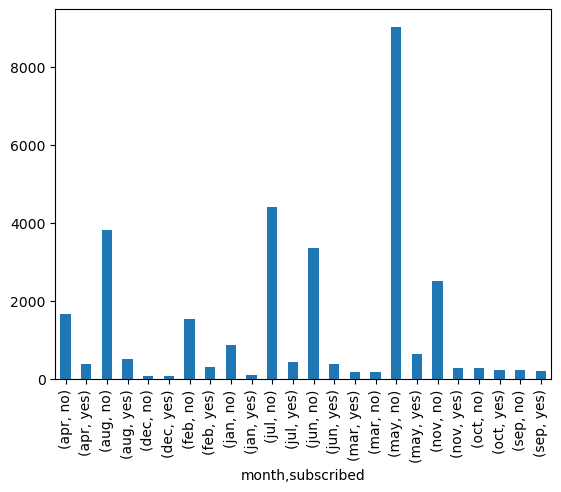

In [175]:
df_of.groupby(by='month')['subscribed'].value_counts().plot.bar()

In [176]:
df_of.groupby(by='day')['subscribed'].value_counts()

day  subscribed
1    no            161
     yes            59
2    no            774
     yes           126
3    no            635
                  ... 
29   yes            93
30   no            908
     yes           174
31   no            425
     yes            35
Name: count, Length: 62, dtype: int64

In [177]:
df_of.groupby(by='day')['subscribed'].value_counts()

day  subscribed
1    no            161
     yes            59
2    no            774
     yes           126
3    no            635
                  ... 
29   yes            93
30   no            908
     yes           174
31   no            425
     yes            35
Name: count, Length: 62, dtype: int64

In [178]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,X
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,X
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,X
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,X


<Axes: xlabel='duration', ylabel='Count'>

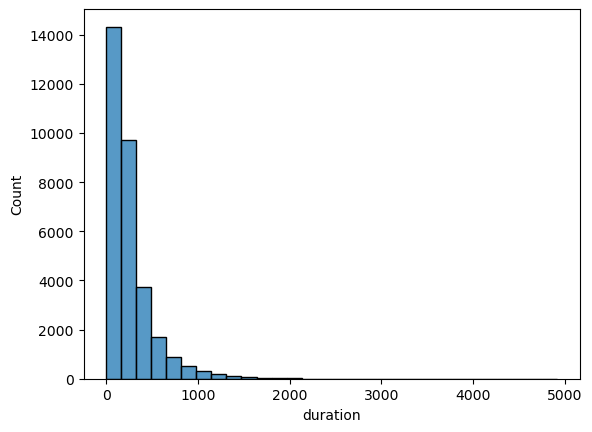

In [179]:
sns.histplot(data=df_of,x='duration',bins=30,)

<Axes: xlabel='duration', ylabel='Count'>

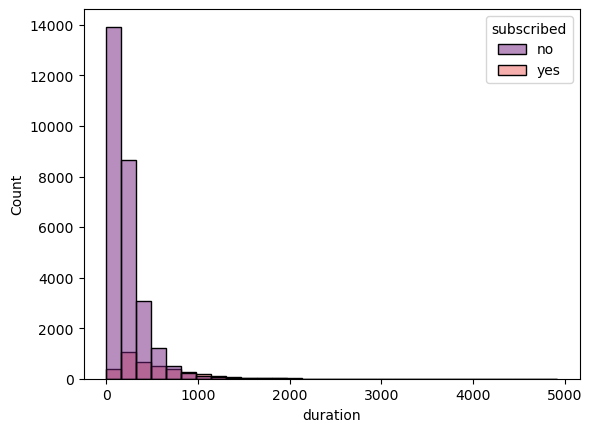

In [180]:
sns.histplot(data=df_of,x='duration',bins=30,hue='subscribed',palette='magma')

<Axes: xlabel='duration', ylabel='Density'>

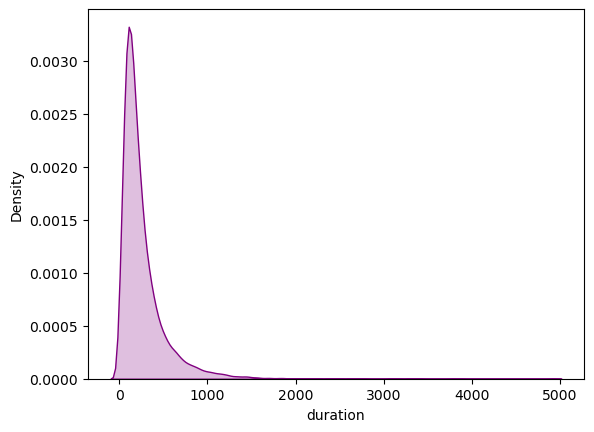

In [181]:
sns.kdeplot(data=df_of,x='duration',fill=True,color='purple')

<Axes: xlabel='subscribed', ylabel='duration'>

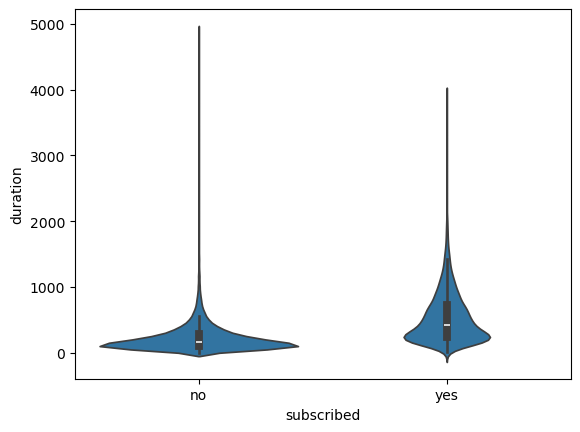

In [182]:
sns.violinplot(data=df_of,x='subscribed',y='duration')

In [183]:
#People who talk longer with customer sales represntative have subscribed to scheme which is understable

In [184]:
df_of.groupby(by='job')['subscribed'].value_counts()

job            subscribed
admin.         no            3179
               yes            452
blue-collar    no            6353
               yes            489
entrepreneur   no             923
               yes             85
housemaid      no             795
               yes             79
management     no            5716
               yes            923
retired        no            1212
               yes            362
self-employed  no             983
               yes            140
services       no            2649
               yes            254
student        no             453
               yes            182
technician     no            4713
               yes            594
unemployed     no             776
               yes            129
unknown        no             180
               yes             26
Name: count, dtype: int64

<Axes: xlabel='job,subscribed'>

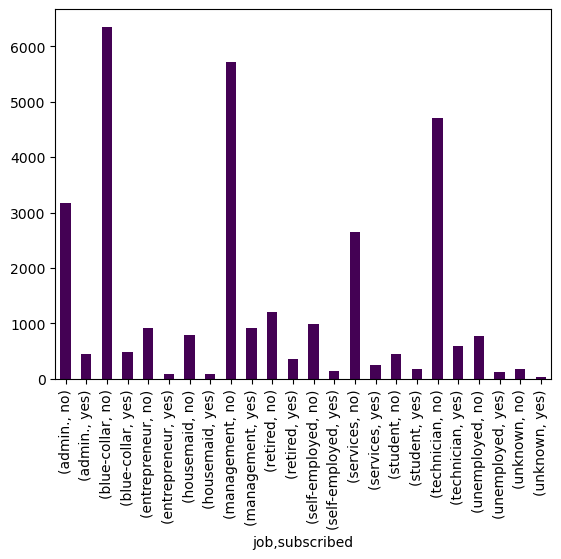

In [185]:
df_of.groupby(by='job')['subscribed'].value_counts().plot.bar(cmap='viridis')

In [186]:
#We have gained enough knowledge about the dataset

In [187]:
#Preprocessing

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
labelencoder = LabelEncoder()

In [189]:
df['subscribed'] = df['subscribed'].replace({'X':2,'yes':1,'no':0})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,2
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,2
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,2
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,2


In [190]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,2
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,2
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,2
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,2


In [191]:
#WE REPLACE NO SUBSCRIPTION VALUES WITH 1 AND YES WITH 2 and not known with 0

In [192]:
#now for housing loan and default credit we will do the same

In [193]:
df['housing'] = labelencoder.fit_transform(df['housing'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,0,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,0,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,1,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,0,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,1,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,0,no,cellular,28,aug,148,4,-1,0,unknown,2
13560,54,blue-collar,married,primary,no,2281,1,no,unknown,20,jun,158,1,-1,0,unknown,2
13561,35,retired,married,primary,no,285,1,no,cellular,29,jan,136,1,-1,0,unknown,2
13562,29,admin.,single,secondary,no,464,0,no,cellular,9,nov,208,2,91,3,success,2


In [194]:
df['loan'] = labelencoder.fit_transform(df['loan'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,0,0,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,0,0,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,1,0,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,0,0,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,1,0,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,0,0,cellular,28,aug,148,4,-1,0,unknown,2
13560,54,blue-collar,married,primary,no,2281,1,0,unknown,20,jun,158,1,-1,0,unknown,2
13561,35,retired,married,primary,no,285,1,0,cellular,29,jan,136,1,-1,0,unknown,2
13562,29,admin.,single,secondary,no,464,0,0,cellular,9,nov,208,2,91,3,success,2


In [195]:
df['default'] = labelencoder.fit_transform(df['default'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,0,1933,0,0,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,0,3,0,0,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,0,891,1,0,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,0,3287,0,0,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,0,119,1,0,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,0,45,0,0,cellular,28,aug,148,4,-1,0,unknown,2
13560,54,blue-collar,married,primary,0,2281,1,0,unknown,20,jun,158,1,-1,0,unknown,2
13561,35,retired,married,primary,0,285,1,0,cellular,29,jan,136,1,-1,0,unknown,2
13562,29,admin.,single,secondary,0,464,0,0,cellular,9,nov,208,2,91,3,success,2


In [196]:
#ONE HOT ENCODING 

In [197]:
from sklearn.preprocessing import OneHotEncoder

In [198]:
ohe = OneHotEncoder()

In [199]:
pd.DataFrame(ohe.fit_transform(df[['job','marital']]).toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45207,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [200]:
#The above is for sample

In [205]:
#df = pd.get_dummies(data=df,columns=['marital','job','education','contact','poutcome'], dtype=int)
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,0,1933,0,0,19,nov,44,2,-1,...,0,0,1,0,1,0,0,0,0,1
1,31,0,3,0,0,20,jul,91,2,-1,...,1,0,0,1,0,0,0,0,0,1
2,27,0,891,1,0,18,jul,240,1,-1,...,1,0,0,1,0,0,0,0,0,1
3,57,0,3287,0,0,22,jun,867,1,84,...,0,1,0,1,0,0,0,0,1,0
4,31,0,119,1,0,4,feb,380,1,-1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,0,45,0,0,28,aug,148,4,-1,...,0,1,0,1,0,0,0,0,0,1
13560,54,0,2281,1,0,20,jun,158,1,-1,...,0,0,0,0,0,1,0,0,0,1
13561,35,0,285,1,0,29,jan,136,1,-1,...,0,0,0,1,0,0,0,0,0,1
13562,29,0,464,0,0,9,nov,208,2,91,...,1,0,0,1,0,0,0,0,1,0


In [201]:
#We will use get dummies option beacuse we can then name the columns as per the variable type

In [206]:
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,0,1933,0,0,19,nov,44,2,-1,...,0,0,1,0,1,0,0,0,0,1
1,31,0,3,0,0,20,jul,91,2,-1,...,1,0,0,1,0,0,0,0,0,1
2,27,0,891,1,0,18,jul,240,1,-1,...,1,0,0,1,0,0,0,0,0,1
3,57,0,3287,0,0,22,jun,867,1,84,...,0,1,0,1,0,0,0,0,1,0
4,31,0,119,1,0,4,feb,380,1,-1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,0,45,0,0,28,aug,148,4,-1,...,0,1,0,1,0,0,0,0,0,1
13560,54,0,2281,1,0,20,jun,158,1,-1,...,0,0,0,0,0,1,0,0,0,1
13561,35,0,285,1,0,29,jan,136,1,-1,...,0,0,0,1,0,0,0,0,0,1
13562,29,0,464,0,0,9,nov,208,2,91,...,1,0,0,1,0,0,0,0,1,0


In [207]:
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,0,1933,0,0,19,nov,44,2,-1,...,0,0,1,0,1,0,0,0,0,1
1,31,0,3,0,0,20,jul,91,2,-1,...,1,0,0,1,0,0,0,0,0,1
2,27,0,891,1,0,18,jul,240,1,-1,...,1,0,0,1,0,0,0,0,0,1
3,57,0,3287,0,0,22,jun,867,1,84,...,0,1,0,1,0,0,0,0,1,0
4,31,0,119,1,0,4,feb,380,1,-1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,0,45,0,0,28,aug,148,4,-1,...,0,1,0,1,0,0,0,0,0,1
13560,54,0,2281,1,0,20,jun,158,1,-1,...,0,0,0,0,0,1,0,0,0,1
13561,35,0,285,1,0,29,jan,136,1,-1,...,0,0,0,1,0,0,0,0,0,1
13562,29,0,464,0,0,9,nov,208,2,91,...,1,0,0,1,0,0,0,0,1,0


In [208]:
#We did ONE HOT ENCODING FOR 5 COLUMNS JOB, MARITAL STATUS, EDUCATION, CONTACT AND POUTCOME

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 13563
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  int64 
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  int64 
 4   loan                 45211 non-null  int64 
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  subscribed           45211 non-null  int64 
 12  marital_divorced     45211 non-null  int64 
 13  marital_married      45211 non-null  int64 
 14  marital_single       45211 non-null  int64 
 15  job_admin.           45211 non-null  int64 
 16  job_blue-

In [210]:
#Now just month column has string values

In [211]:
df_month = pd.DataFrame(ohe.fit_transform(df[['month']]).toarray(),columns=ohe.get_feature_names_out())
df_month

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45207,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45208,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [212]:
df = df.join(df_month)

In [213]:
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,0,1933,0,0,19,nov,44,2,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,31,0,3,0,0,20,jul,91,2,-1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,0,891,1,0,18,jul,240,1,-1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,57,0,3287,0,0,22,jun,867,1,84,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,31,0,119,1,0,4,feb,380,1,-1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,0,45,0,0,28,aug,148,4,-1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13560,54,0,2281,1,0,20,jun,158,1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13561,35,0,285,1,0,29,jan,136,1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13562,29,0,464,0,0,9,nov,208,2,91,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [214]:
df.drop('month',axis=1,inplace=True)

In [215]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,0,1933,0,0,19,44,2,-1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,31,0,3,0,0,20,91,2,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,0,891,1,0,18,240,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,57,0,3287,0,0,22,867,1,84,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,31,0,119,1,0,4,380,1,-1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,0,45,0,0,28,148,4,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13560,54,0,2281,1,0,20,158,1,-1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13561,35,0,285,1,0,29,136,1,-1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13562,29,0,464,0,0,9,208,2,91,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 13563
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   default              45211 non-null  int64  
 2   balance              45211 non-null  int64  
 3   housing              45211 non-null  int64  
 4   loan                 45211 non-null  int64  
 5   day                  45211 non-null  int64  
 6   duration             45211 non-null  int64  
 7   campaign             45211 non-null  int64  
 8   pdays                45211 non-null  int64  
 9   previous             45211 non-null  int64  
 10  subscribed           45211 non-null  int64  
 11  marital_divorced     45211 non-null  int64  
 12  marital_married      45211 non-null  int64  
 13  marital_single       45211 non-null  int64  
 14  job_admin.           45211 non-null  int64  
 15  job_blue-collar      45211 non-null  int6

In [217]:
df.iloc[:,37:].astype(int)

,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0,0,0,0,0,1,0,0,0,0,0,0
13560,0,0,0,0,0,0,0,0,0,1,0,0
13561,0,0,0,0,0,0,0,0,1,0,0,0
13562,0,0,0,0,0,0,0,0,1,0,0,0


In [218]:
for c in df.columns[37:]:
    print(c)
    df[c] = df[c].astype(int)
df

month_apr
month_aug
month_dec
month_feb
month_jan
month_jul
month_jun
month_mar
month_may
month_nov
month_oct
month_sep


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,0,1933,0,0,19,44,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
1,31,0,3,0,0,20,91,2,-1,0,...,0,0,0,1,0,0,0,0,0,0
2,27,0,891,1,0,18,240,1,-1,0,...,0,0,0,1,0,0,0,0,0,0
3,57,0,3287,0,0,22,867,1,84,3,...,0,0,0,0,1,0,0,0,0,0
4,31,0,119,1,0,4,380,1,-1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,0,45,0,0,28,148,4,-1,0,...,0,0,0,1,0,0,0,0,0,0
13560,54,0,2281,1,0,20,158,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
13561,35,0,285,1,0,29,136,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
13562,29,0,464,0,0,9,208,2,91,3,...,0,0,0,0,0,0,1,0,0,0


In [219]:
#We have tranformed the float values of month to integer

In [221]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,0,1933,0,0,19,44,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
1,31,0,3,0,0,20,91,2,-1,0,...,0,0,0,1,0,0,0,0,0,0
2,27,0,891,1,0,18,240,1,-1,0,...,0,0,0,1,0,0,0,0,0,0
3,57,0,3287,0,0,22,867,1,84,3,...,0,0,0,0,1,0,0,0,0,0
4,31,0,119,1,0,4,380,1,-1,0,...,0,1,0,0,0,0,0,0,0,0


In [222]:
from sklearn.preprocessing import StandardScaler

In [223]:
X = df.drop('subscribed',axis=1)

In [224]:
y = df['subscribed']

In [225]:
scaler = StandardScaler()

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
X_train = X.iloc[0:31647]
X_train

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,0,1933,0,0,19,44,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
1,31,0,3,0,0,20,91,2,-1,0,...,0,0,0,1,0,0,0,0,0,0
2,27,0,891,1,0,18,240,1,-1,0,...,0,0,0,1,0,0,0,0,0,0
3,57,0,3287,0,0,22,867,1,84,3,...,0,0,0,0,1,0,0,0,0,0
4,31,0,119,1,0,4,380,1,-1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,0,0,1,0,12,116,2,-1,0,...,0,0,0,0,0,0,1,0,0,0
31643,53,0,380,0,1,5,438,2,-1,0,...,0,0,0,0,1,0,0,0,0,0
31644,32,0,312,0,0,7,37,3,-1,0,...,0,0,0,0,0,0,0,0,0,0
31645,57,0,225,1,0,15,22,7,337,12,...,0,0,0,0,0,0,1,0,0,0


In [228]:
X_test = X.iloc[31647:,]
X_test

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,32,0,118,1,0,15,20,6,-1,0,...,0,0,0,0,0,0,0,1,0,0
1,78,0,2787,0,0,1,372,1,-1,0,...,0,0,0,1,0,0,0,0,0,0
2,31,0,144,1,0,16,676,1,-1,0,...,0,0,0,1,0,0,0,0,0,0
3,57,0,3777,1,0,13,65,2,-1,0,...,0,0,0,0,1,0,0,0,0,0
4,45,0,-705,0,1,3,111,1,-1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,0,45,0,0,28,148,4,-1,0,...,0,0,0,1,0,0,0,0,0,0
13560,54,0,2281,1,0,20,158,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
13561,35,0,285,1,0,29,136,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
13562,29,0,464,0,0,9,208,2,91,3,...,0,0,0,0,0,0,1,0,0,0


In [229]:
y_train = y.iloc[0:31647]
y_train

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [230]:
y_test = y.iloc[31647:]
y_test

0        2
1        2
2        2
3        2
4        2
        ..
13559    2
13560    2
13561    2
13562    2
13563    2
Name: subscribed, Length: 13564, dtype: int64

In [231]:
X_train.shape

(31647, 48)

In [232]:
X_test.shape

(13564, 48)

In [233]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.415793,-0.137234,0.187933,-1.118201,-0.439893,0.379579,-0.832754,-0.245906,-0.408555,-0.237059,...,-0.07061,-0.247523,-0.17848,-0.425119,-0.365972,-0.104522,-0.66328,3.220488,-0.128236,-0.114566
1,-0.937156,-0.137234,-0.449397,-1.118201,-0.439893,0.499526,-0.649957,-0.245906,-0.408555,-0.237059,...,-0.07061,-0.247523,-0.17848,2.352283,-0.365972,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566
2,-1.313627,-0.137234,-0.156159,0.894294,-0.439893,0.259631,-0.070449,-0.567059,-0.408555,-0.237059,...,-0.07061,-0.247523,-0.17848,2.352283,-0.365972,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566
3,1.509911,-0.137234,0.635055,-1.118201,-0.439893,0.739422,2.368149,-0.567059,0.447299,1.001336,...,-0.07061,-0.247523,-0.17848,-0.425119,2.732452,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566
4,-0.937156,-0.137234,-0.411091,0.894294,-0.439893,-1.419637,0.474054,-0.567059,-0.408555,-0.237059,...,-0.07061,4.040030,-0.17848,-0.425119,-0.365972,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.125392,-0.137234,-0.450388,0.894294,-0.439893,-0.460055,-0.552724,-0.245906,-0.408555,-0.237059,...,-0.07061,-0.247523,-0.17848,-0.425119,-0.365972,-0.104522,1.50766,-0.310512,-0.128236,-0.114566
31643,1.133439,-0.137234,-0.324903,-1.118201,2.273280,-1.299690,0.699635,-0.245906,-0.408555,-0.237059,...,-0.07061,-0.247523,-0.17848,-0.425119,2.732452,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566
31644,-0.843038,-0.137234,-0.347358,-1.118201,-0.439893,-1.059794,-0.859979,0.075247,-0.408555,-0.237059,...,-0.07061,-0.247523,-0.17848,-0.425119,-0.365972,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566
31645,1.509911,-0.137234,-0.376088,0.894294,-0.439893,-0.100212,-0.918319,1.359859,2.994723,4.716521,...,-0.07061,-0.247523,-0.17848,-0.425119,-0.365972,-0.104522,1.50766,-0.310512,-0.128236,-0.114566


In [234]:
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_test

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,-0.843038,-0.137234,-0.411422,0.894294,-0.439893,-0.100212,-0.926098,1.038706,-0.408555,-0.237059,...,-0.07061,-0.247523,-0.17848,-0.425119,-0.365972,-0.104522,-0.66328,3.220488,-0.128236,-0.114566
1,3.486388,-0.137234,0.469944,-1.118201,-0.439893,-1.779480,0.442940,-0.567059,-0.408555,-0.237059,...,-0.07061,-0.247523,-0.17848,2.352283,-0.365972,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566
2,-0.937156,-0.137234,-0.402836,0.894294,-0.439893,0.019735,1.625291,-0.567059,-0.408555,-0.237059,...,-0.07061,-0.247523,-0.17848,2.352283,-0.365972,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566
3,1.509911,-0.137234,0.796864,0.894294,-0.439893,-0.340108,-0.751079,-0.245906,-0.408555,-0.237059,...,-0.07061,-0.247523,-0.17848,-0.425119,2.732452,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566
4,0.380496,-0.137234,-0.683195,-1.118201,2.273280,-1.539585,-0.572170,-0.567059,-0.408555,-0.237059,...,-0.07061,4.040030,-0.17848,-0.425119,-0.365972,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.184212,-0.137234,-0.435528,-1.118201,-0.439893,1.459108,-0.428266,0.396400,-0.408555,-0.237059,...,-0.07061,-0.247523,-0.17848,2.352283,-0.365972,-0.104522,-0.66328,-0.310512,-0.128236,-0.114566
13560,1.227557,-0.137234,0.302851,0.894294,-0.439893,0.499526,-0.389373,-0.567059,-0.408555,-0.237059,...,-0.07061,-0.247523,-0.17848,-0.425119,-0.365972,-0.104522,-0.66328,3.220488,-0.128236,-0.114566
13561,-0.560684,-0.137234,-0.356274,0.894294,-0.439893,1.579056,-0.474938,-0.567059,-0.408555,-0.237059,...,-0.07061,-0.247523,-0.17848,-0.425119,-0.365972,-0.104522,1.50766,-0.310512,-0.128236,-0.114566
13562,-1.125392,-0.137234,-0.297164,-1.118201,-0.439893,-0.819899,-0.194907,-0.245906,0.517781,1.001336,...,-0.07061,-0.247523,-0.17848,-0.425119,-0.365972,-0.104522,1.50766,-0.310512,-0.128236,-0.114566


In [235]:
df.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,...,0.021204,0.002837,-0.005755,0.002321,0.037634,0.014851,-0.091579,0.023677,0.040949,0.027833
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,...,-0.009625,-0.009491,-0.003252,0.030862,0.009023,-0.009482,-0.009671,0.002389,-0.012206,-0.009739
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,...,0.024621,-0.004909,-0.016910,-0.035845,0.020211,0.018738,-0.049708,0.075915,0.027927,0.006212
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,...,-0.038529,-0.045133,-0.045902,-0.049025,-0.066829,-0.049870,0.303256,-0.002466,-0.054525,-0.054281
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,...,-0.015673,-0.000494,0.000431,0.115125,-0.017095,-0.026323,-0.019552,0.014165,-0.018200,-0.020542
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,...,-0.002521,-0.202439,0.170627,0.105249,-0.136822,-0.027300,-0.012858,0.069257,0.020216,-0.038575
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,...,0.014757,-0.002286,0.008864,0.008990,-0.012404,-0.008111,0.005735,-0.004703,0.006522,0.011330
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,...,-0.005898,-0.025868,-0.040811,0.070351,0.030753,-0.012465,-0.044799,-0.057789,-0.035199,-0.028816
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,...,0.035055,0.044181,0.031054,-0.088798,-0.078824,0.027170,0.051197,0.008114,0.038670,0.049263
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,...,0.026664,0.045212,0.024830,-0.055248,-0.045125,0.019834,0.003884,0.025645,0.035368,0.044218


<Axes: >

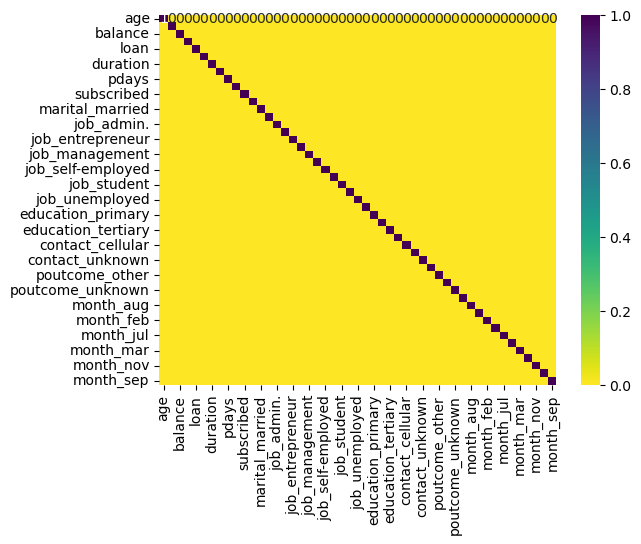

In [197]:
sns.heatmap(df.corr()>0.7,annot=True,cmap='viridis_r')

<Axes: >

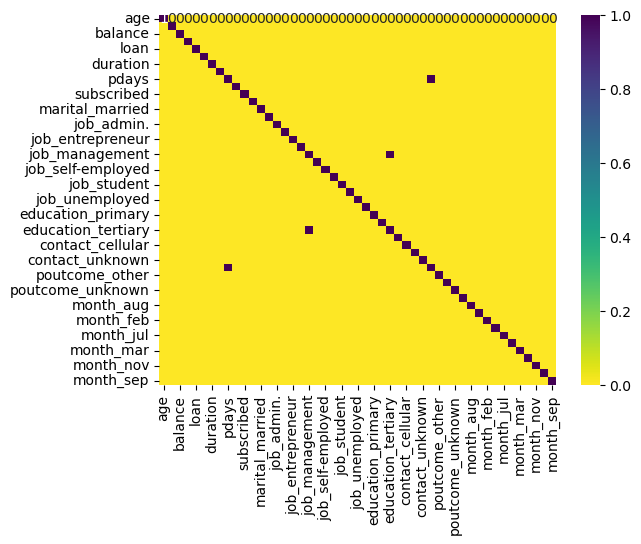

In [198]:
sns.heatmap(df.corr()>0.5,annot=True,cmap='viridis_r')

In [284]:
#Old heatmap

In [199]:
#Now we will test our model

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
logistic_regression = LogisticRegression()

In [240]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [241]:
log_pred = logistic_regression.predict(X_test)

In [242]:
log_pred

array([0, 0, 0, ..., 0, 1, 0])

In [243]:
from sklearn.tree import DecisionTreeClassifier

In [244]:
dtc = DecisionTreeClassifier()

In [245]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [246]:
dtc_pred = dtc.predict(X_test)

In [247]:
dtc_pred

array([0, 1, 0, ..., 0, 1, 0])

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
rfc = RandomForestClassifier()

In [250]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [251]:
rfc_pred = rfc.predict(X_test)

In [252]:
rfc_pred

array([0, 0, 0, ..., 0, 1, 0])

In [253]:
from sklearn.ensemble import GradientBoostingClassifier

In [254]:
gbc = GradientBoostingClassifier()

In [255]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [256]:
gbc_pred = gbc.predict(X_test)

In [257]:
gbc_pred

array([0, 0, 0, ..., 0, 1, 0])

In [258]:
from xgboost import XGBClassifier

In [259]:
XGB = XGBClassifier()

In [260]:
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [261]:
xgbpred = XGB.predict(X_test)

In [262]:
xgbpred

array([0, 1, 0, ..., 0, 1, 0])

In [263]:
#IN MOST MODELS WE SEE THAT DUE TO LESS NUMBER OF SAMPLES OF SUBSCRIBED COLUMN IT GETS A LOW F1 SCORE

In [264]:
from sklearn.model_selection import GridSearchCV

In [265]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],        
    'max_depth': [3, 5, 7, 9],               
    'min_samples_split': [2, 5, 10, 15, 20],          
    'min_samples_leaf': [1, 2, 4, 6, 8],             
}

In [266]:
grid = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1,verbose=1)

In [267]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='accuracy', verbose=1)

In [268]:
grid.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=50)

In [269]:
grid.best_score_

0.8974310784355571

In [270]:
grid_pred = grid.predict(X_test)

In [272]:
#We are not getting much success using hyperparamter tuning, so we will use Random Forest classifier

In [273]:
model = RandomForestClassifier()

In [274]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [275]:
predictions = model.predict(X_test)

In [276]:
predictions

array([0, 1, 0, ..., 0, 1, 0])

In [277]:
#Lets put this predictions into dataframe

In [278]:
df['subscribed'].iloc[31647:] = predictions
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,0,1933,0,0,19,44,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
1,31,0,3,0,0,20,91,2,-1,0,...,0,0,0,1,0,0,0,0,0,0
2,27,0,891,1,0,18,240,1,-1,0,...,0,0,0,1,0,0,0,0,0,0
3,57,0,3287,0,0,22,867,1,84,3,...,0,0,0,0,1,0,0,0,0,0
4,31,0,119,1,0,4,380,1,-1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,0,45,0,0,28,148,4,-1,0,...,0,0,0,1,0,0,0,0,0,0
13560,54,0,2281,1,0,20,158,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
13561,35,0,285,1,0,29,136,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
13562,29,0,464,0,0,9,208,2,91,3,...,0,0,0,0,0,0,1,0,0,0


In [279]:
import pickle

In [280]:
with open('BankMarketingModel.pkl','wb') as file:
    pickle.dump(model, file)

In [281]:
#We have saved the model

In [282]:
#Thus we have successfully built and tested a machine learning model to predict whether a bank customer will buy fixed deopist or not